<a href="https://colab.research.google.com/github/Banafshehkh/Interview_Preparation/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [117]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [55]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
data = pd.read_csv("/content/drive/MyDrive/interview/diabetes_prediction_dataset.csv")
data.head(6)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0


In [57]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [94]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,0,25.19,6.6,140,0
1,1.0,54.0,0,0,1,27.32,6.6,80,0
2,0.0,28.0,0,0,0,27.32,5.7,158,0
3,1.0,36.0,0,0,2,23.45,5.0,155,0
4,0.0,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1.0,80.0,0,0,1,27.32,6.2,90,0
99996,1.0,2.0,0,0,1,17.37,6.5,100,0
99997,0.0,66.0,0,0,3,27.83,5.7,155,0
99998,1.0,24.0,0,0,0,35.42,4.0,100,0


In [59]:
data["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [60]:
data["gender"] = data.gender.map({"Female": 1,
                                  "Male": 0})
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,never,25.19,6.6,140,0
1,1.0,54.0,0,0,No Info,27.32,6.6,80,0
2,0.0,28.0,0,0,never,27.32,5.7,158,0
3,1.0,36.0,0,0,current,23.45,5.0,155,0
4,0.0,76.0,1,1,current,20.14,4.8,155,0


In [61]:
fig = px.bar(data,
                 x = "gender",
                 y = "diabetes",
                 color="gender")

fig.show()

In [62]:
data["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [63]:
data["smoking_history"] = data["smoking_history"].map({"never": 0,
                                  "No Info": 1,
                                  "current": 2,
                                  "former": 3,
                                  "ever": 4,
                                  "not current":5})
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,0,25.19,6.6,140,0
1,1.0,54.0,0,0,1,27.32,6.6,80,0
2,0.0,28.0,0,0,0,27.32,5.7,158,0
3,1.0,36.0,0,0,2,23.45,5.0,155,0
4,0.0,76.0,1,1,2,20.14,4.8,155,0


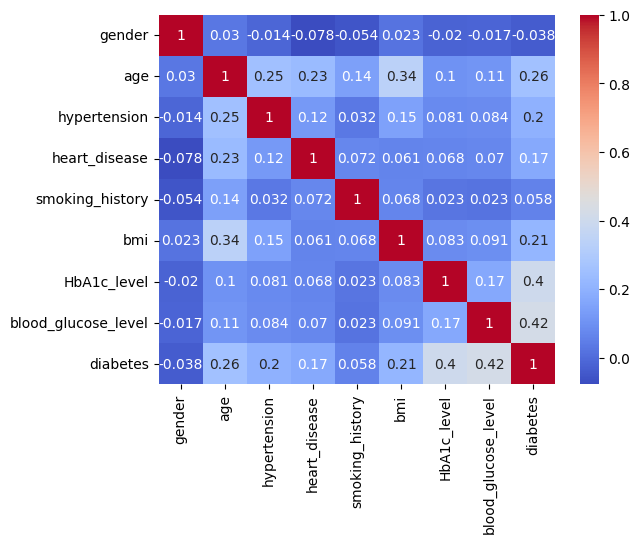

In [64]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

In [65]:
correlation["diabetes"].sort_values(ascending = False)


diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
smoking_history        0.057908
gender                -0.037623
Name: diabetes, dtype: float64

In [68]:
X = data.iloc[:,1:-1]
y = data["diabetes"]

In [96]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [70]:
train_size=0.8
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [102]:
# Upsampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = undersample.fit_resample(X, y)

In [104]:
y_over[y_over==1]
#146383
#79999

8500     1
8501     1
8502     1
8503     1
8504     1
        ..
16995    1
16996    1
16997    1
16998    1
16999    1
Name: diabetes, Length: 8500, dtype: int64

In [72]:
from sklearn.ensemble import RandomForestClassifier


In [105]:
RF = RandomForestClassifier(max_depth=2, random_state=0)
RF.fit(X_over, y_over)

RandomForestClassifier(max_depth=2, random_state=0)

In [106]:
valid_score = RF.score(X_valid, y_valid)


In [107]:
test_score = RF.score(X_test, y_test)


In [108]:
y_pred = RF.predict(X_test)


In [109]:
RF.predict([[25, 1, 1, 2, 25, 6, 100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([0])

In [110]:
test_score

0.9246

In [111]:
precision = precision_score(y_test, y_pred)
precision

0.5195936139332366

In [112]:
recall = recall_score(y_test, y_pred)
recall

0.8861386138613861

In [113]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9192
           1       0.52      0.89      0.66       808

    accuracy                           0.92     10000
   macro avg       0.75      0.91      0.81     10000
weighted avg       0.95      0.92      0.93     10000



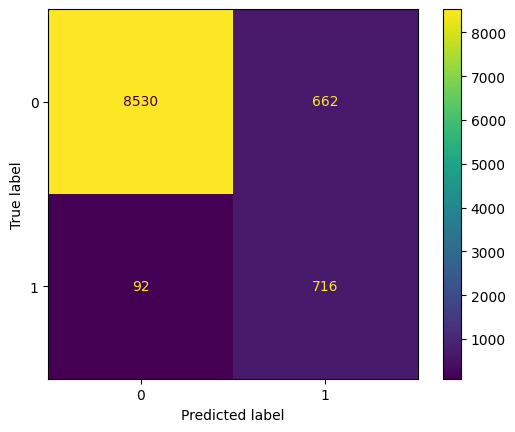

In [116]:
cm = confusion_matrix(y_test, y_pred, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot()
